<a href="https://colab.research.google.com/github/Codechickdev/ML_Projects/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Personality Analysis

## ToDo
- [x] Download Packages and Dataset
- [x] Load Dataset
- [ ] Data Analysis
- [ ] Data Preprocessing
- [ ] Model Traning

## Reference
- [Dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

### Download Packages and Dataset

In [1]:
%%bash

pip install opendatasets --quiet

In [2]:
import os
import numpy as np
import pandas as pd
import opendatasets as od

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

%matplotlib inline

In [3]:
dirList = os.listdir()
DATASET_URL = 'https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis'

In [4]:
if 'customer-personality-analysis-segmentation' not in dirList:
    od.download(DATASET_URL)

100%|██████████| 62.0k/62.0k [00:00<00:00, 25.7MB/s]

### Load Dataset

In [5]:
CSV_FILE_PATH = '/content/customer-personality-analysis/marketing_campaign.csv'

In [6]:
df = pd.read_csv(CSV_FILE_PATH, sep = '\t')
df.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0


### Data Analysis

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [10]:
print(f"Shape: {df.shape}")

Shape: (2240, 29)


In [11]:
print(f"Columns: {df.columns}")

Columns: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


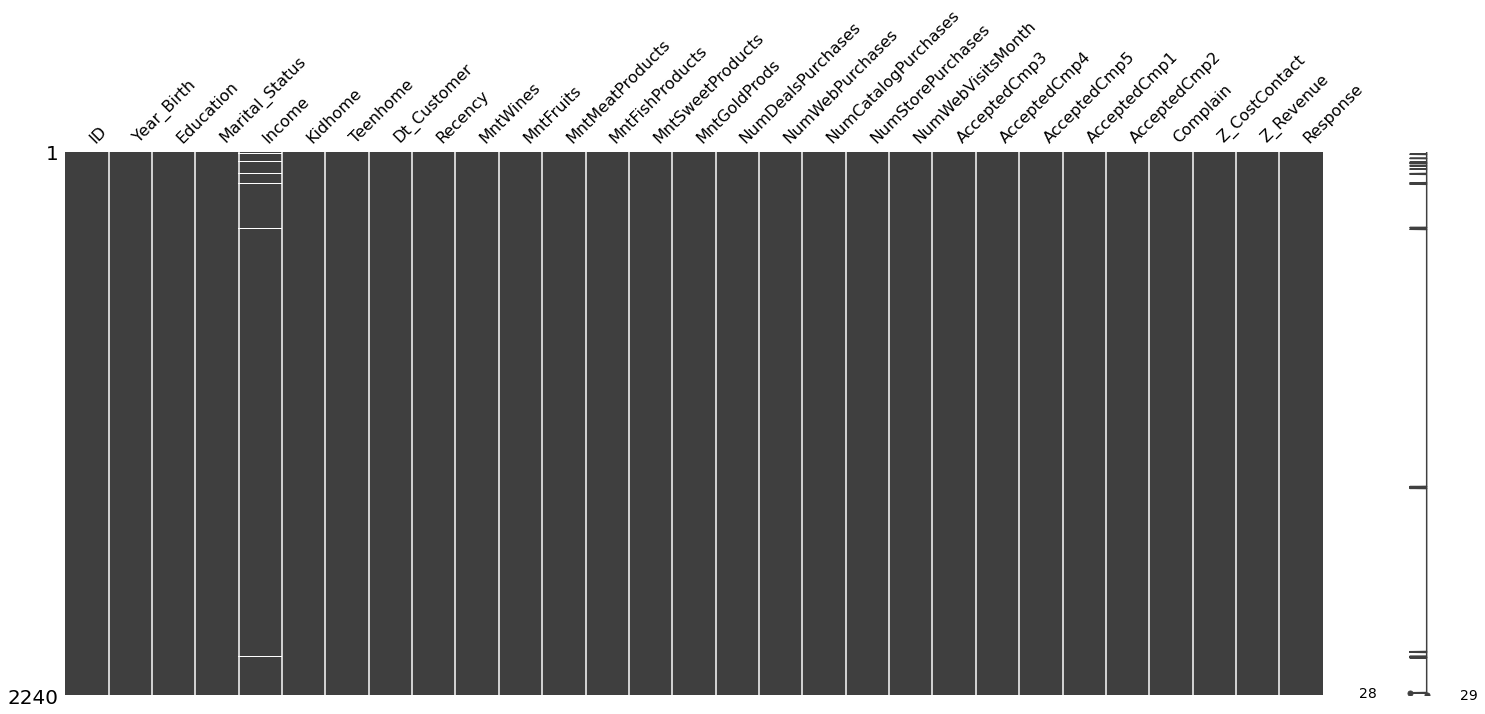

In [12]:
mn.matrix(df)
plt.show()

### Data Preprocessing

In [13]:
df['Income'].isna().sum()

24

In [14]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Income'].isna().sum()

0

In [15]:
df['Current_Age'] = 2022 - df['Year_Birth']
df['Current_Age'].head(3)

0    65
1    68
2    57
Name: Current_Age, dtype: int64

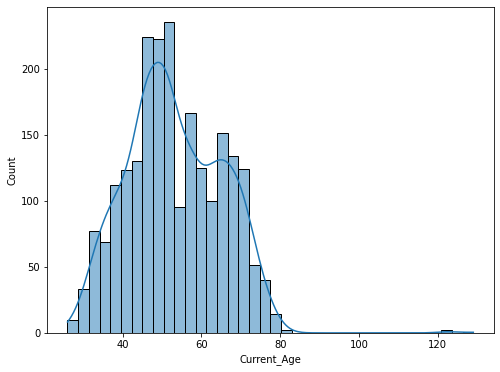

In [28]:
plt.figure(figsize = (8, 6))
sns.histplot(df['Current_Age'], kde = True)
plt.show()

In [16]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Kids'].head(3)

0    0
1    2
2    0
Name: Kids, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


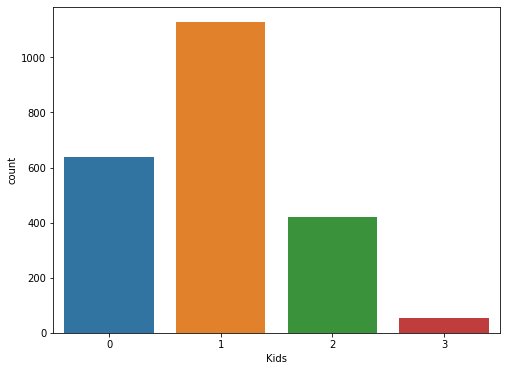

In [36]:
plt.figure(figsize = (8, 6))
sns.countplot(df['Kids'])
plt.show()

In [17]:
def replaceValues(arr, value, column_value):
    return df[column_value].replace(arr, value)

In [19]:
df['Education'] = replaceValues(arr = ['Basic'], value = 'UnderGraduate', column_value = 'Education')
df['Education'].value_counts()

Graduation       1127
PhD               486
Master            370
2n Cycle          203
UnderGraduate      54
Name: Education, dtype: int64

In [20]:
df['Education'] = replaceValues(arr = ['Graduation', 'PhD', 'Master', '2n Cycle'], value = 'PostGraduate', column_value = 'Education')
df['Education'].value_counts()

PostGraduate     2186
UnderGraduate      54
Name: Education, dtype: int64